<img src="../Images/buoys.png" align="right" hspace=”50” vspace=”50” alt="Model Image" style="width: 500px;">

# Winds and waves

Here you will explore the relation of wind and waves at Hein Bank and Neah Bay buoy sites (see image on right). Notice that these two locations are very different. While Neah Bay is just on the border of the Pacific Ocean, Hein Bank is tucked inside the Strait of Juan de Fuca. What might this mean for the relationship between wind and waves at these locations? We will see.

**Note: for reference dataset units are here: https://www.ndbc.noaa.gov/measdes.shtml*




### Loading packages and initial setup

In [1]:
# Let's import our standard packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy
sns.set()

# Let's use pip to install this NDBC package
# !pip install NDBC <- Uncomment if using Google Colabsc
from NDBC.NDBC import DataBuoy

In [2]:
# Recall from our previous notebook we explored how to load NDCB data. 
# Below we write a function to do all of this for us
ndbc_id = '46088'
DB = DataBuoy()
DB.set_station_id(ndbc_id) # Hein Bank 
DB.get_station_metadata()
DB.station_info
DB.get_stdmet(years=[2011],months=[1,2,3,4,5,6,7,8,9,10,11,12],datetime_index=True)

Jan not available.
Feb not available.
Mar not available.
Apr not available.
May not available.
Jun not available.
Jul not available.
Aug not available.
Sep not available.
Oct not available.
Nov not available.
Dec not available.



In [7]:
# Here I've written a function that will grab the buoy data and clean it up.
# To use this function you just specify the buoy id and years of interest as you will see below
def get_ndbc(ndbc_id,yrs):
  DB = DataBuoy()
  DB.set_station_id(ndbc_id) # Hein Bank 
  DB.get_station_metadata()
  DB.station_info
  DB.get_stdmet(years=yrs,months=[1,2,3,4,5,6,7,8,9,10,11,12],datetime_index=True)
  df = DB.data['stdmet']['data']
  df = df.astype(float) # This was critical to do, otherwise we got the error "no numeric data to plot"
  z_scores = scipy.stats.zscore(df['PRES']) 
  varlist = ['WDIR','WSPD','GST','WVHT','DPD','APD','MWD','PRES','ATMP','WTMP']
  for myvar in varlist:
    z_scores = scipy.stats.zscore(df[myvar])
    abs_z_scores = np.abs(z_scores)
    bad_values = (abs_z_scores > 3)
    df[myvar][bad_values] = np.nan  
  return df    


### Task 1 - Wind and waves at Hein Bank

Here you will do two things
* Download data for Hein Bank, buoy id 46088 for years 2011 and 2012.
* Plot wave height (y-axis) vs wind speed (x-axis), with the scattered dots colored by wave period. See the notebook, 01_Introduction, for guidance in plotting

The variables have the following keys in the dataset
* Wave height (WVHT)
* Wind speed (WSPD)
* Wave period (APD)

Note
* Remember to label your axes! Including your colorbar,
* Units can be found here: https://www.ndbc.noaa.gov/measdes.shtml

In [9]:
# To get you started, let's use the function we just created above, get_ndbc()
# its as simple as:
noaa_id = '46088'
years = ['2011','2012']
df = get_ndbc(noaa_id,years)
# Remember that the error message below is just a bug in the NDBC library

Jan not available.
Feb not available.
Mar not available.
Apr not available.
May not available.
Jun not available.
Jul not available.
Aug not available.
Sep not available.
Oct not available.
Nov not available.
Dec not available.



Text(0, 0.5, 'Wave Height [m]')

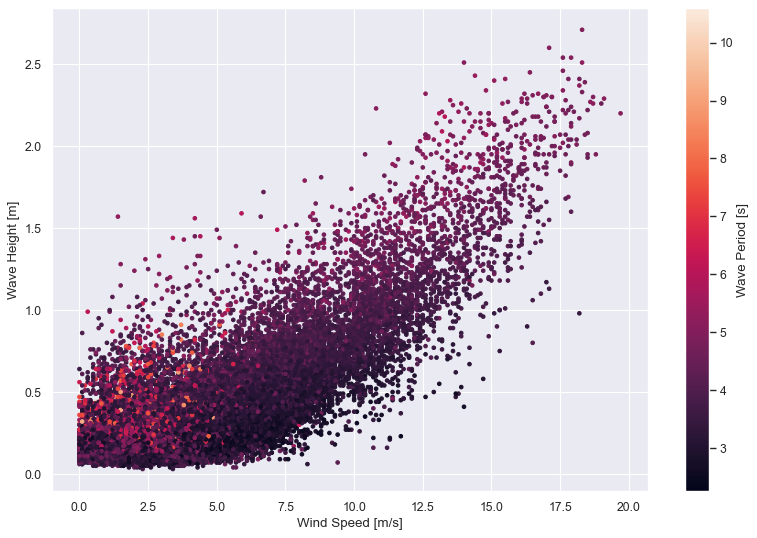

In [12]:
# Now fill in the code here to create the plot described above
f = plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')

# Your code here
# Solution below - delete before giving to students
plt.scatter(x=df['WSPD'], y=df['WVHT'], c=df['APD'], s=10)
cb = plt.colorbar()
cb.set_label('Wave Period [s]')
plt.xlabel('Wind Speed [m/s]')
plt.ylabel('Wave Height [m]')

Answer the following:
* Is there a relation between wave heights and wind speeds? Is it linear?
* What is the average period of wave heights greateer than 1-meter?
* Do you think local winds generating waves at Hein Bank? Why?

your answers here

### Task 2 - Wind and waves at Neah Bay

Repeat the analysis that you did for Hein Bank for Neah Bay, buoy id 46087.


Oct not available.
Dec not available.



Text(0, 0.5, 'Wave Height [m]')

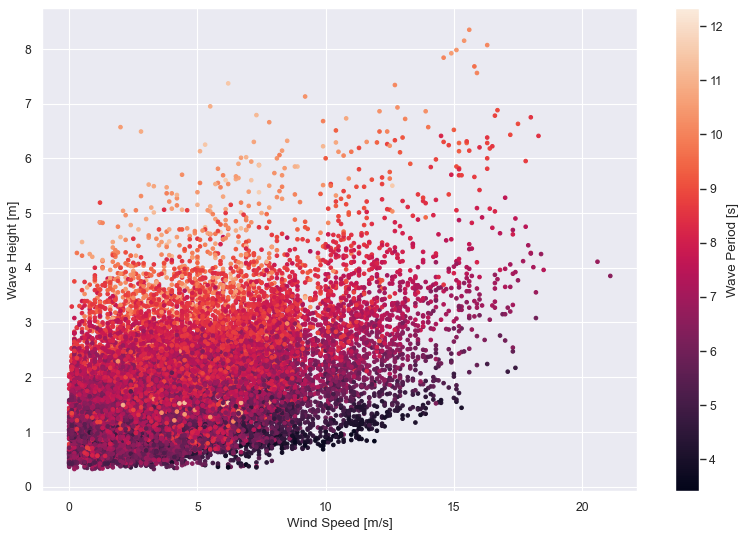

In [13]:
# Your code here
# Solutio below - remove before giving to students

noaa_id = '46087'
years = ['2011','2012']
df = get_ndbc(noaa_id,years)
f = plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(x=df['WSPD'], y=df['WVHT'], c=df['APD'], s=10)
cb = plt.colorbar()
cb.set_label('Wave Period [s]')
plt.xlabel('Wind Speed [m/s]')
plt.ylabel('Wave Height [m]')

Answer the following
* Do you see a relation between wind and waves here? Is it as clear as before at Hein Bank?
* What are the average wave periods for wave heights greater than 1-meter? Is this different than at Hein Bank?
* Are the waves measured by the Neah Bay buoy, in general, generated by winds nearby? How can you tell? Explain using the differences you see at Hein Bank and Neah Bay and their geography to explain your answer

your answer here